In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
PARENT_PATH = os.path.join("..")
DATA_CSV = os.path.join(PARENT_PATH, "data", "data1.csv")
RESULT_CSV = os.path.join(PARENT_PATH, "data", "analyzed.csv")
TAGS_TXT = os.path.join(PARENT_PATH, "data", "tags.txt")
MIN_TEXT_LEN = 2500

In [10]:
df = pd.read_csv(DATA_CSV)

In [11]:
df.head()

,id,time_published,author,title,content,lang,comment_count,reading_count,score,is_tutorial,tags_string,classes_string
0,83335,2010-02-06T20:31:19+00:00,NaN,Blender для школы и ВУЗа,"<div xmlns=""http://www.w3.org/1999/xhtml"">О вы...",ru,18,1791,14,0,"blender,blender basics,книги,учебник,учебное п...",Чулан
1,1,2006-07-13T14:23:39+00:00,Denis Kryuchkov,Wiki-FAQ для Хабрахабра,"<div xmlns=""http://www.w3.org/1999/xhtml"">Прив...",ru,67,35578,1,0,"хабрахаб,wiki,FAQ,ЧАВО,механизм,движок",Habr
2,166669,2013-01-22T14:09:19+00:00,NaN,Новые софтфоны YouMagic теперь с кодеком OPUS,"<div xmlns=""http://www.w3.org/1999/xhtml"">Уваж...",ru,14,6718,2,0,"youmagic,ip-телефония,МТТ,softphone,linux,windows","Блог компании МТТ,Разработка систем связи"
3,2,2006-07-13T20:45:38+00:00,Юрий Баландин,Мы знаем много недоделок на сайте… но!,"<div xmlns=""http://www.w3.org/1999/xhtml"">Кром...",ru,37,17611,0,0,"ошибки,баги,bugs,error,warning",Habr
4,4,2006-07-14T13:59:37+00:00,Denis Kryuchkov,"Маслов, Сокур и партнеры пиарят Google в России","<div xmlns=""http://www.w3.org/1999/xhtml"">Наск...",ru,15,3796,1,0,"Google,Маслов,Сокур и партнеры,PR,сопровождени...",Чулан


In [12]:
df = df[["id", "title", "content", "tags_string"]].dropna()

In [13]:
df["size"] = df[["content"]].apply(lambda row: len(row["content"]), axis=1)
df = df.loc[df['size'] >= MIN_TEXT_LEN]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148233 entries, 0 to 207371
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           148233 non-null  int64 
 1   title        148233 non-null  object
 2   content      148233 non-null  object
 3   tags_string  148233 non-null  object
 4   size         148233 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.8+ MB


In [14]:
df = df[["content", "tags_string"]]

In [15]:
df.head()

,content,tags_string
0,"<div xmlns=""http://www.w3.org/1999/xhtml"">О вы...","blender,blender basics,книги,учебник,учебное п..."
2,"<div xmlns=""http://www.w3.org/1999/xhtml"">Уваж...","youmagic,ip-телефония,МТТ,softphone,linux,windows"
5,"<div xmlns=""http://www.w3.org/1999/xhtml"">Улуч...","юзабилити,проектирование интерфейсов,ecommerce..."
7,"<div xmlns=""http://www.w3.org/1999/xhtml""><img...","forex,трейдинг,механическая торговля,эксперт"
9,"<div xmlns=""http://www.w3.org/1999/xhtml"">Риск...","занимательная экономика,экономика,поведение,но..."


In [18]:
df.to_csv(RESULT_CSV, columns=["content", "tags"])

In [16]:
def get_tags_string(data):
    res = dict()
    for row in data:
        arr = row.strip("[]").replace("'", "").split(',')
        
        for item in arr:
            if item in res:
                res[item] += 1
            else:
                res[item] = 1
    return res

In [21]:
tags_dict = get_tags_string(df['tags'].values)

In [22]:
len(tags_dict)

110365

In [23]:
sort_tags_dict = sorted(tags_dict.items(), key=lambda x: x[1], reverse=True)

In [25]:
EXPLORE_TAG_COUNT = 20

In [26]:
tags = sort_tags_dict[0:EXPLORE_TAG_COUNT]

x = []
x_label = []

for i in tags:
    x_label.append(i[0])
    x.append(i[1])

In [27]:
print(tags)

[('javascript', 3482), ('android', 3255), ('php', 2473), ('java', 2418), ('linux', 2398), ('python', 2345), ('программирование', 2019), ('разработка', 1842), ('ios', 1594), ('google', 1550), ('c++', 1548), ('microsoft', 1501), ('.net', 1494), ('информационная безопасность', 1296), ('стартапы', 1257), ('c#', 1249), ('css', 1189), ('apple', 1128), ('игры', 1078), ('open source', 1075)]


([<matplotlib.axis.XTick at 0x7f449b9b88b0>,
 [Text(0, 0, 'javascript'),
  Text(1, 0, 'android'),
  Text(2, 0, 'php'),
  Text(3, 0, 'java'),
  Text(4, 0, 'linux'),
  Text(5, 0, 'python'),
  Text(6, 0, 'программирование'),
  Text(7, 0, 'разработка'),
  Text(8, 0, 'ios'),
  Text(9, 0, 'google'),
  Text(10, 0, 'c++'),
  Text(11, 0, 'microsoft'),
  Text(12, 0, '.net'),
  Text(13, 0, 'информационная безопасность'),
  Text(14, 0, 'стартапы'),
  Text(15, 0, 'c#'),
  Text(16, 0, 'css'),
  Text(17, 0, 'apple'),
  Text(18, 0, 'игры'),
  Text(19, 0, 'open source')])

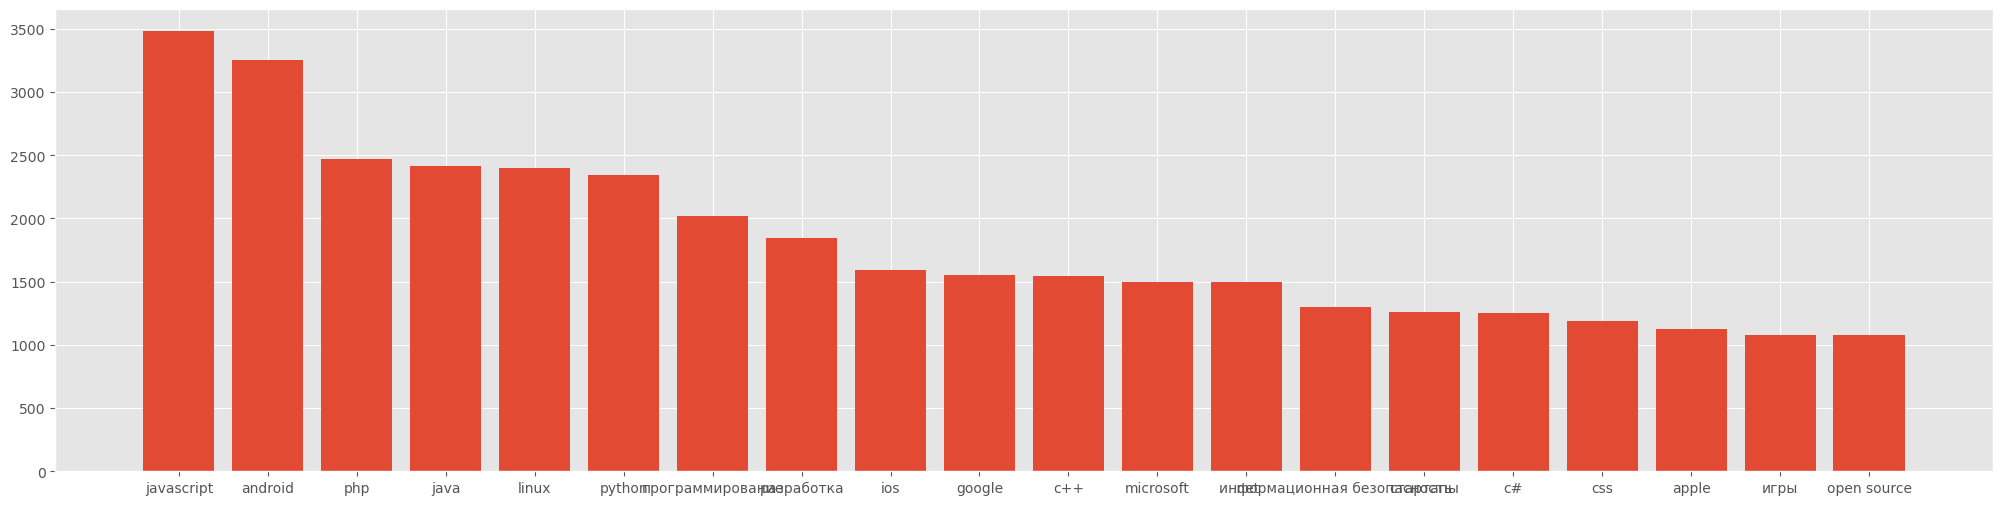

In [31]:
fig = plt.figure(figsize=(25, 6))
plt.style.use('ggplot')
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), x_label)

In [32]:
main_tags = sort_tags_dict[0:20]

y = []
y_label = []

for i in main_tags:
    y_label.append(i[0][0:8] + "...")
    y.append(i[1])

([<matplotlib.axis.XTick at 0x7f449bb31340>,
 [Text(0, 0, 'javascri...'),
  Text(1, 0, 'android...'),
  Text(2, 0, 'php...'),
  Text(3, 0, 'java...'),
  Text(4, 0, 'linux...'),
  Text(5, 0, 'python...'),
  Text(6, 0, 'программ...'),
  Text(7, 0, 'разработ...'),
  Text(8, 0, 'ios...'),
  Text(9, 0, 'google...'),
  Text(10, 0, 'c++...'),
  Text(11, 0, 'microsof...'),
  Text(12, 0, '.net...'),
  Text(13, 0, 'информац...'),
  Text(14, 0, 'стартапы...'),
  Text(15, 0, 'c#...'),
  Text(16, 0, 'css...'),
  Text(17, 0, 'apple...'),
  Text(18, 0, 'игры...'),
  Text(19, 0, 'open sou...')])

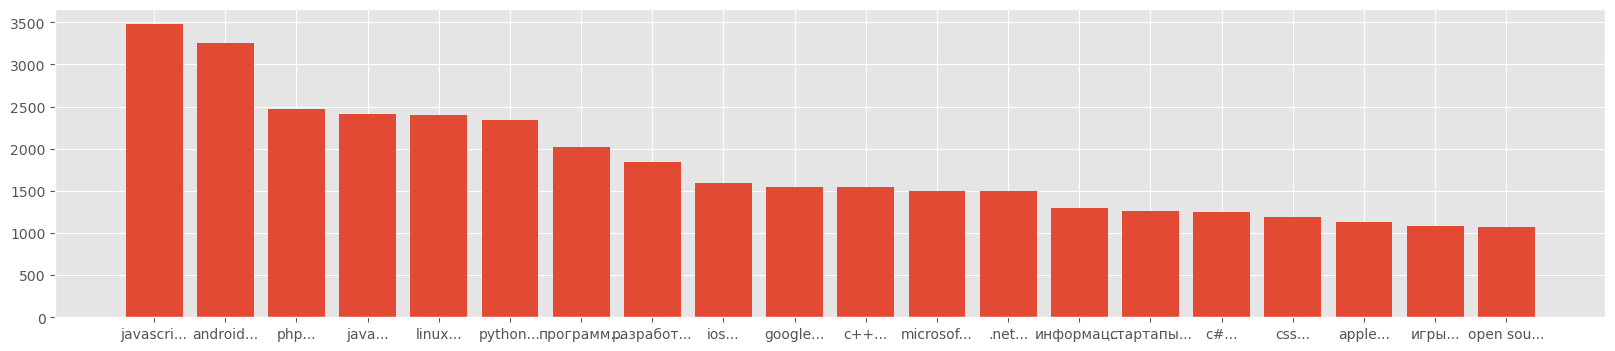

In [34]:
fig = plt.figure(figsize=(20, 4))
plt.style.use('ggplot')
plt.bar(range(len(y)), y)
plt.xticks(range(len(y)), y_label)

In [35]:
TAGS = [x[0] for x in main_tags]

In [36]:
TAGS

['javascript',
 'android',
 'php',
 'java',
 'linux',
 'python',
 'программирование',
 'разработка',
 'ios',
 'google',
 'c++',
 'microsoft',
 '.net',
 'информационная безопасность',
 'стартапы',
 'c#',
 'css',
 'apple',
 'игры',
 'open source']

In [37]:
with open(TAGS_TXT, 'w') as fw:
    json.dump(TAGS, fw)